<a href="https://colab.research.google.com/github/changsin/FSDL/blob/main/plate_recognizer/notebooks/kaggle_data_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Kaggle license plate dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/changsin/FSDL

Cloning into 'FSDL'...
remote: Enumerating objects: 622, done.
remote: Counting objects: 100% (622/622), done.
remote: Compressing objects: 100% (449/449), done.
remote: Total 622 (delta 384), reused 327 (delta 161), pack-reused 0
Receiving objects: 100% (622/622), 96.10 MiB | 7.51 MiB/s, done.
Resolving deltas: 100% (384/384), done.


In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("plate_recognizer") is None:
    import sys
    sys.path.append('..')

In [ ]:
# TODO: creates some incompatibility problems so commenting out for now
# !pip install pytorch_lightning==1.1.4

In [74]:
from FSDL.plate_recognizer.data.kaggle_data import KaggleData
from FSDL.plate_recognizer.data.cluster import Cluster

kaggle_data = KaggleData()
kaggle_data.prepare_data()
kaggle_data.cluster_data(unique=False)
kaggle_data.X.shape

(433, 224, 224, 3)

In [53]:
kaggle_data.test_idx

{0: array([356, 358, 359, 368, 370, 372, 374, 376, 378, 381, 385, 389, 392,
        408, 412, 420, 422, 423, 425, 428, 429, 432]),
 1: array([355, 361, 367, 371, 380, 383, 388, 391, 397, 399, 400, 402, 404,
        406, 409, 413, 415, 418, 426, 427, 431]),
 2: array([326, 334, 337, 342, 362, 364, 366, 373, 377, 379, 393, 398, 405,
        419, 424, 430]),
 3: array([357, 369, 382, 387, 407, 414]),
 4: array([341, 345, 346, 347, 348, 352, 360, 363, 365, 375, 384, 386, 390,
        394, 395, 396, 401, 403, 410, 411, 416, 417, 421])}

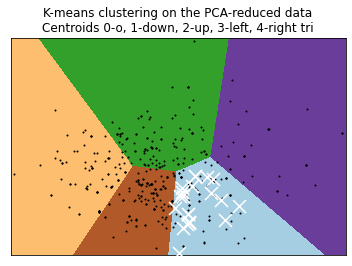

In [54]:
plots.plot_data_in_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca, kaggle_data.test_idx[0])

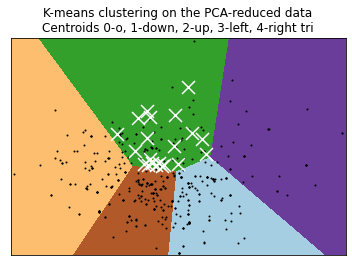

In [55]:
plots.plot_data_in_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca, kaggle_data.test_idx[1])

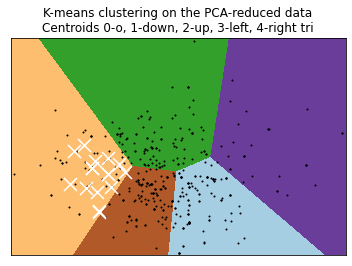

In [56]:
plots.plot_data_in_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca, kaggle_data.test_idx[2])

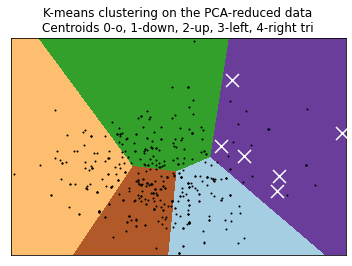

In [57]:
plots.plot_data_in_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca, kaggle_data.test_idx[3])

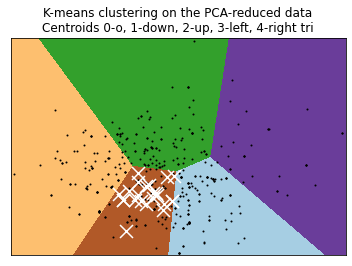

In [58]:
plots.plot_data_in_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca, kaggle_data.test_idx[4])

##### log path is /content #####
##### log path is /content #####


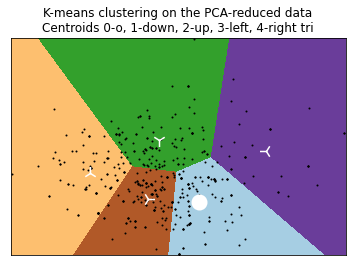

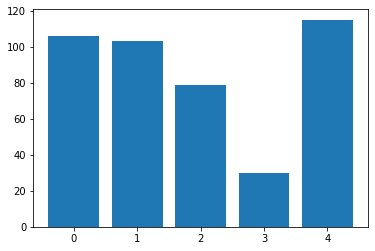

In [6]:
import FSDL.plate_recognizer.utils.plots as plots

K = 5

plots.plot_pca_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca)
plots.plot_cluster_histogram(kaggle_data.X_pca_clusters, K)

2021-06-01 05:24:30,389 - FSDL.plate_recognizer.data.cluster - INFO - cluster.py:102 - Found 145 duplicates


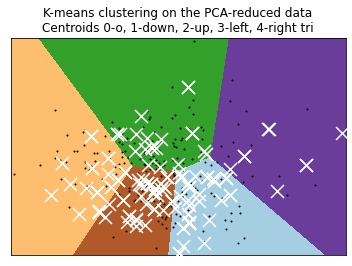

In [7]:
to_remove_idx = Cluster.find_duplicates(kaggle_data.X_pca_reduced)
plots.plot_data_in_clusters(kaggle_data.X_pca_reduced, kaggle_data.kmeans_pca, to_remove_idx)

# Remove duplicate data points

In [73]:
kaggle_data_uniq = KaggleData()
kaggle_data_uniq.prepare_data()
kaggle_data_uniq.cluster_data(K=5, unique=True)

2021-06-01 07:17:09,927 - FSDL.plate_recognizer.data.cluster - INFO - cluster.py:104 - Found 145 duplicates
2021-06-01 07:17:09,928 - FSDL.plate_recognizer.data.kaggle_data - INFO - kaggle_data.py:76 - Removing duplicates 145
2021-06-01 07:17:09,929 - FSDL.plate_recognizer.data.kaggle_data - INFO - kaggle_data.py:80 - Using only 288


In [ ]:
def calc_variances(X_pca_reduced):
  # Calculate distances of all points
  distances = cdist(X_pca_reduced, X_pca_reduced)

  # Find duplicates (very similar images)
  # dupes = np.array([np.where(distances[id] < 1) for id in range(distances.shape[0])]).reshape(-1)
  dupes = [np.array(np.where(distances[id] < 1)).reshape(-1).tolist() \
          for id in range(distances.shape[0])]

  to_remove = set()
  for d in dupes:
      if len(d) > 1:
          for id in range(1, len(d)):
              to_remove.add(d[id])
  logger.info("Found {} duplicates".format(len(to_remove)))
  return to_remove

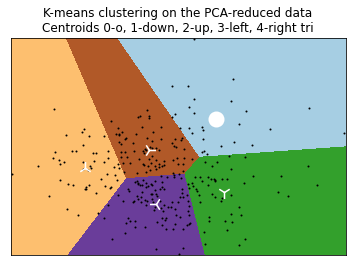

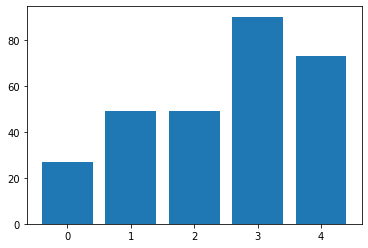

In [12]:
plots.plot_pca_clusters(kaggle_data_uniq.X_pca_reduced, kaggle_data_uniq.kmeans_pca)
plots.plot_cluster_histogram(kaggle_data_uniq.X_pca_clusters, K)

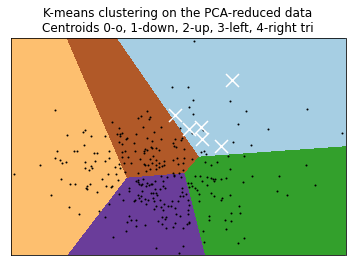

In [100]:
plots.plot_data_in_clusters(kaggle_data_uniq.X_pca_reduced,
                            kaggle_data_uniq.kmeans_pca,
                            kaggle_data_uniq.test_idx[0])

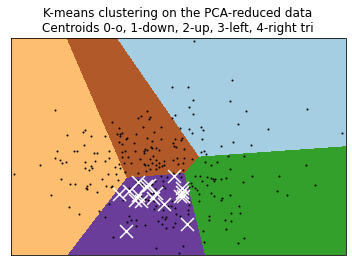

In [99]:
plots.plot_data_in_clusters(kaggle_data_uniq.X_pca_reduced,
                            kaggle_data_uniq.kmeans_pca,
                            kaggle_data_uniq.test_idx[3])

# Weights and Biases

In [60]:
!pip install wandb -qqq
import wandb
wandb.login()

     |████████████████████████████████| 1.8MB 8.1MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 174kB 56.4MB/s 
     |████████████████████████████████| 133kB 58.0MB/s 
     |████████████████████████████████| 71kB 11.9MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Train

## Train with the full dataset

In [90]:
from FSDL.plate_recognizer.data.base_data_module import DataType
from FSDL.plate_recognizer.models.plate_model import PlateModel
from FSDL.plate_recognizer.training.trainer import Trainer

plate_model = PlateModel()

X_train, Y_train = kaggle_data.get_data(data_type=DataType.Train)
model_cnn = plate_model.create_model(Y_train.shape[0])

trainer = Trainer(model_cnn)
model_cnn = trainer.train(kaggle_data, epochs=100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 4)                 516       
Total params: 17,951,364
Trainable params: 3,236,676
Non-trainable params: 14,714,688
__________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


epoch,49
loss,0.00118
accuracy,0.90686
val_loss,0.00109
val_accuracy,1.0
_runtime,31
_timestamp,1622533923
_step,49
best_val_loss,0.00089
best_epoch,37


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▇█▇▇▅▄▆▆▄▅▄▂▅▅▄▆▆▄▃▃▃▃▁▂▂▃▁▂▂▂▂▃▂▂▁▃▂▃▂
accuracy,▁▃▄▅▃▃▃▄▄▅▄▅█▅▄▂▂▅▅▄▃▄▃▆▄▅▃▆▄▄▃▄▄▄▆▆▅▅▅▃
val_loss,▄▁█▆▇▄▅▁▃▅▁▇▂▅▅▆▅▃▄▃▆▄▂▂▆▃▃▂▃█▁▃▄▃▅▆▅▂▆▃
val_accuracy,▁█▃█▆▆▆▆█▁▃▆█▆▆▆▆▃▆▆▆█▃▆█▆█▆██▃█▆▃████▆█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


Epoch 1/100
20/20 [==============================] - 3s 74ms/step - loss: 0.0535 - accuracy: 0.6015 - val_loss: 0.0296 - val_accuracy: 0.5263


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 2/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0154 - accuracy: 0.6975 - val_loss: 0.0156 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 3/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0108 - accuracy: 0.7844 - val_loss: 0.0168 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 4/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0090 - accuracy: 0.7670 - val_loss: 0.0144 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 5/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0070 - accuracy: 0.7518 - val_loss: 0.0193 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 6/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0079 - accuracy: 0.7987 - val_loss: 0.0139 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 7/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0057 - accuracy: 0.8351 - val_loss: 0.0154 - val_accuracy: 0.6316


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 8/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0055 - accuracy: 0.8501 - val_loss: 0.0176 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 9/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0046 - accuracy: 0.8310 - val_loss: 0.0187 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 10/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0052 - accuracy: 0.7927 - val_loss: 0.0163 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 11/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0041 - accuracy: 0.8473 - val_loss: 0.0170 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 12/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0052 - accuracy: 0.8353 - val_loss: 0.0165 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 13/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0043 - accuracy: 0.8385 - val_loss: 0.0131 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 14/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0038 - accuracy: 0.8188 - val_loss: 0.0139 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 15/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0034 - accuracy: 0.8600 - val_loss: 0.0155 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 16/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0041 - accuracy: 0.8477 - val_loss: 0.0143 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 17/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0028 - accuracy: 0.8388 - val_loss: 0.0140 - val_accuracy: 0.6316


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 18/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0026 - accuracy: 0.9083 - val_loss: 0.0128 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 19/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0030 - accuracy: 0.8494 - val_loss: 0.0127 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 20/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0029 - accuracy: 0.8362 - val_loss: 0.0134 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 21/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0026 - accuracy: 0.8879 - val_loss: 0.0149 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 22/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0026 - accuracy: 0.8473 - val_loss: 0.0133 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 23/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0025 - accuracy: 0.8377 - val_loss: 0.0132 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 24/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0025 - accuracy: 0.8741 - val_loss: 0.0130 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 25/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0025 - accuracy: 0.8868 - val_loss: 0.0133 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 26/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0025 - accuracy: 0.8891 - val_loss: 0.0128 - val_accuracy: 0.7895


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 27/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0023 - accuracy: 0.8843 - val_loss: 0.0125 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 28/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0028 - accuracy: 0.8961 - val_loss: 0.0130 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 29/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0024 - accuracy: 0.8844 - val_loss: 0.0138 - val_accuracy: 0.6316


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 30/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0023 - accuracy: 0.9050 - val_loss: 0.0127 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 31/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0027 - accuracy: 0.8594 - val_loss: 0.0128 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 32/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0025 - accuracy: 0.8766 - val_loss: 0.0158 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 33/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0023 - accuracy: 0.8839 - val_loss: 0.0125 - val_accuracy: 0.7895


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 34/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0023 - accuracy: 0.8699 - val_loss: 0.0136 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 35/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0021 - accuracy: 0.9024 - val_loss: 0.0167 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 36/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0019 - accuracy: 0.8664 - val_loss: 0.0133 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 37/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0018 - accuracy: 0.9252 - val_loss: 0.0108 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 38/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0022 - accuracy: 0.8449 - val_loss: 0.0132 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 39/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0017 - accuracy: 0.8768 - val_loss: 0.0131 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 40/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0020 - accuracy: 0.8557 - val_loss: 0.0123 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 41/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0019 - accuracy: 0.9113 - val_loss: 0.0132 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 42/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0018 - accuracy: 0.9499 - val_loss: 0.0135 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 43/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0019 - accuracy: 0.8956 - val_loss: 0.0148 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 44/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0018 - accuracy: 0.9015 - val_loss: 0.0119 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 45/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0021 - accuracy: 0.9282 - val_loss: 0.0134 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 46/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0018 - accuracy: 0.9207 - val_loss: 0.0119 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 47/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0016 - accuracy: 0.8983 - val_loss: 0.0120 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 48/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9381 - val_loss: 0.0164 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 49/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0017 - accuracy: 0.9118 - val_loss: 0.0135 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 50/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0014 - accuracy: 0.9112 - val_loss: 0.0124 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 51/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0014 - accuracy: 0.9358 - val_loss: 0.0127 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 52/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0017 - accuracy: 0.9015 - val_loss: 0.0130 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 53/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9254 - val_loss: 0.0131 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 54/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0014 - accuracy: 0.9356 - val_loss: 0.0129 - val_accuracy: 0.8158


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 55/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0016 - accuracy: 0.9052 - val_loss: 0.0134 - val_accuracy: 0.6316


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 56/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9221 - val_loss: 0.0121 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 57/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9044 - val_loss: 0.0135 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 58/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.8954 - val_loss: 0.0127 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 59/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.8895 - val_loss: 0.0129 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 60/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.8979 - val_loss: 0.0124 - val_accuracy: 0.6316


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 61/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0016 - accuracy: 0.9295 - val_loss: 0.0132 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 62/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 0.9053 - val_loss: 0.0133 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 63/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0016 - accuracy: 0.8592 - val_loss: 0.0143 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 64/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0017 - accuracy: 0.8978 - val_loss: 0.0137 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 65/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9122 - val_loss: 0.0119 - val_accuracy: 0.7895


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 66/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9428 - val_loss: 0.0127 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 67/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9525 - val_loss: 0.0142 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 68/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9160 - val_loss: 0.0127 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 69/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9572 - val_loss: 0.0136 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 70/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9182 - val_loss: 0.0118 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 71/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.9342 - val_loss: 0.0140 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 72/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9233 - val_loss: 0.0122 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 73/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9419 - val_loss: 0.0131 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 74/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9103 - val_loss: 0.0136 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 75/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0013 - accuracy: 0.9330 - val_loss: 0.0134 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 76/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0013 - accuracy: 0.9149 - val_loss: 0.0134 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 77/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 0.9445 - val_loss: 0.0127 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 78/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0014 - accuracy: 0.9092 - val_loss: 0.0130 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 79/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0015 - accuracy: 0.8972 - val_loss: 0.0113 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 80/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.9403 - val_loss: 0.0118 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 81/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0013 - accuracy: 0.9410 - val_loss: 0.0132 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 82/100
20/20 [==============================] - 1s 40ms/step - loss: 9.7001e-04 - accuracy: 0.9428 - val_loss: 0.0139 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 83/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9320 - val_loss: 0.0137 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 84/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.9147 - val_loss: 0.0131 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 85/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9531 - val_loss: 0.0128 - val_accuracy: 0.6579


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 86/100
20/20 [==============================] - 1s 39ms/step - loss: 9.9681e-04 - accuracy: 0.9202 - val_loss: 0.0131 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 87/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9470 - val_loss: 0.0126 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 88/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0010 - accuracy: 0.9432 - val_loss: 0.0135 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 89/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9069 - val_loss: 0.0119 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 90/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0018 - accuracy: 0.9339 - val_loss: 0.0141 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 91/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9462 - val_loss: 0.0136 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 92/100
20/20 [==============================] - 1s 39ms/step - loss: 9.8215e-04 - accuracy: 0.9445 - val_loss: 0.0138 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 93/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0012 - accuracy: 0.9400 - val_loss: 0.0126 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 94/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0010 - accuracy: 0.9553 - val_loss: 0.0143 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 95/100
20/20 [==============================] - 1s 39ms/step - loss: 9.2839e-04 - accuracy: 0.9382 - val_loss: 0.0123 - val_accuracy: 0.6842


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 96/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 0.9308 - val_loss: 0.0133 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 97/100
20/20 [==============================] - 1s 39ms/step - loss: 7.3048e-04 - accuracy: 0.9371 - val_loss: 0.0130 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 98/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0013 - accuracy: 0.9243 - val_loss: 0.0113 - val_accuracy: 0.7105


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 99/100
20/20 [==============================] - 1s 39ms/step - loss: 9.0154e-04 - accuracy: 0.9269 - val_loss: 0.0127 - val_accuracy: 0.7632


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 100/100
20/20 [==============================] - 1s 39ms/step - loss: 9.0938e-04 - accuracy: 0.9155 - val_loss: 0.0126 - val_accuracy: 0.7368


wandb: WARNING No validation_data set, pass a generator to the callback.


2021-06-01 08:05:22,356 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:37 - Score : 78.41%
100/100 [==============================] - 1s 5ms/step - loss: 0.0061 - accuracy: 0.7955
2021-06-01 08:05:23,554 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:41 - Test results 
 Loss: 0.006094656884670258
 Accuracy: 0.7954545617103577


## Train with unique data points

With the duplicate data points removed, the model train much faster and better accuracy 78% -> 92%

In [91]:
plate_model_uniq = PlateModel()

X_train_uniq, Y_train_uniq = kaggle_data_uniq.get_data(data_type=DataType.Train)
model_cnn_uniq = plate_model.create_model(Y_train_uniq.shape[0])

trainer_uniq = Trainer(model_cnn_uniq, name="Trained on unique data points")
model_cnn_uniq = trainer.train(kaggle_data_uniq, epochs=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 4)                 516       
Total params: 17,951,364
Trainable params: 3,236,676
Non-trainable params: 14,714,688
__________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


epoch,99
loss,0.0012
accuracy,0.9316
val_loss,0.01257
val_accuracy,0.73684
_runtime,83
_timestamp,1622534719
_step,99
best_val_loss,0.01084
best_epoch,36


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▅▅▆▆▇▆▇▇▆▇▇▇▇▇▇▇▇█▇██▇██████▇███▇█▇████
val_loss,█▃▂▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▁▂▂▂▂▂▁▂▂▁▂▂▁▁▂▂▂▁
val_accuracy,▁▅▅▅▆▆▅▄▅▆▇▄▇▅▄▄▇▆▇▆▆█▆▅▅▆▅▅▇▇▅▅▅▅▅▆▇▆▅▆
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


Epoch 1/100
13/13 [==============================] - 1s 44ms/step - loss: 0.0013 - accuracy: 0.9167 - val_loss: 9.6276e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 2/100
13/13 [==============================] - 1s 41ms/step - loss: 0.0011 - accuracy: 0.9118 - val_loss: 8.9807e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 3/100
13/13 [==============================] - 1s 42ms/step - loss: 0.0011 - accuracy: 0.9608 - val_loss: 8.9780e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 4/100
13/13 [==============================] - 1s 41ms/step - loss: 9.8365e-04 - accuracy: 0.9363 - val_loss: 8.4044e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 5/100
13/13 [==============================] - 1s 41ms/step - loss: 0.0010 - accuracy: 0.9363 - val_loss: 0.0010 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 6/100
13/13 [==============================] - 1s 41ms/step - loss: 0.0011 - accuracy: 0.9314 - val_loss: 9.1273e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 7/100
13/13 [==============================] - 1s 41ms/step - loss: 0.0010 - accuracy: 0.9461 - val_loss: 6.9232e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 8/100
13/13 [==============================] - 1s 41ms/step - loss: 0.0010 - accuracy: 0.9510 - val_loss: 7.7674e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 9/100
13/13 [==============================] - 1s 41ms/step - loss: 9.8255e-04 - accuracy: 0.9314 - val_loss: 0.0010 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 10/100
13/13 [==============================] - 1s 41ms/step - loss: 0.0010 - accuracy: 0.9706 - val_loss: 7.4403e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 11/100
13/13 [==============================] - 1s 41ms/step - loss: 9.1047e-04 - accuracy: 0.9461 - val_loss: 8.3161e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 12/100
13/13 [==============================] - 1s 41ms/step - loss: 9.2715e-04 - accuracy: 0.9608 - val_loss: 9.7396e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 13/100
13/13 [==============================] - 1s 42ms/step - loss: 9.1716e-04 - accuracy: 0.9510 - val_loss: 5.9151e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 14/100
13/13 [==============================] - 1s 42ms/step - loss: 9.5892e-04 - accuracy: 0.9559 - val_loss: 8.5163e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 15/100
13/13 [==============================] - 1s 42ms/step - loss: 8.5225e-04 - accuracy: 0.9461 - val_loss: 6.3672e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 16/100
13/13 [==============================] - 1s 41ms/step - loss: 9.8378e-04 - accuracy: 0.9608 - val_loss: 6.6709e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 17/100
13/13 [==============================] - 1s 41ms/step - loss: 9.8689e-04 - accuracy: 0.9510 - val_loss: 7.0633e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 18/100
13/13 [==============================] - 1s 41ms/step - loss: 9.6605e-04 - accuracy: 0.9412 - val_loss: 0.0011 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 19/100
13/13 [==============================] - 1s 42ms/step - loss: 8.7595e-04 - accuracy: 0.9461 - val_loss: 7.7773e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 20/100
13/13 [==============================] - 1s 41ms/step - loss: 9.0957e-04 - accuracy: 0.9314 - val_loss: 7.0739e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 21/100
13/13 [==============================] - 1s 41ms/step - loss: 9.8034e-04 - accuracy: 0.9657 - val_loss: 5.5511e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 22/100
13/13 [==============================] - 1s 41ms/step - loss: 9.1875e-04 - accuracy: 0.9608 - val_loss: 7.8548e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 23/100
13/13 [==============================] - 1s 41ms/step - loss: 8.9082e-04 - accuracy: 0.9461 - val_loss: 8.8781e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 24/100
13/13 [==============================] - 1s 41ms/step - loss: 8.8787e-04 - accuracy: 0.9510 - val_loss: 6.6398e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 25/100
13/13 [==============================] - 1s 41ms/step - loss: 8.3490e-04 - accuracy: 0.9657 - val_loss: 7.1462e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 26/100
13/13 [==============================] - 1s 41ms/step - loss: 9.5099e-04 - accuracy: 0.9412 - val_loss: 8.3650e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 27/100
13/13 [==============================] - 1s 41ms/step - loss: 8.3471e-04 - accuracy: 0.9314 - val_loss: 9.0774e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 28/100
13/13 [==============================] - 1s 41ms/step - loss: 8.8280e-04 - accuracy: 0.9363 - val_loss: 8.1650e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 29/100
13/13 [==============================] - 1s 41ms/step - loss: 8.7379e-04 - accuracy: 0.9657 - val_loss: 6.1179e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 30/100
13/13 [==============================] - 1s 41ms/step - loss: 8.6958e-04 - accuracy: 0.9706 - val_loss: 8.8819e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 31/100
13/13 [==============================] - 1s 41ms/step - loss: 8.9642e-04 - accuracy: 0.9314 - val_loss: 6.3757e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 32/100
13/13 [==============================] - 1s 41ms/step - loss: 8.9515e-04 - accuracy: 0.9363 - val_loss: 8.3519e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 33/100
13/13 [==============================] - 1s 41ms/step - loss: 8.9523e-04 - accuracy: 0.9510 - val_loss: 0.0010 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 34/100
13/13 [==============================] - 1s 41ms/step - loss: 8.2831e-04 - accuracy: 0.9755 - val_loss: 6.8482e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 35/100
13/13 [==============================] - 1s 41ms/step - loss: 8.8567e-04 - accuracy: 0.9706 - val_loss: 9.2490e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 36/100
13/13 [==============================] - 1s 41ms/step - loss: 9.0685e-04 - accuracy: 0.9363 - val_loss: 7.8256e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 37/100
13/13 [==============================] - 1s 41ms/step - loss: 7.9679e-04 - accuracy: 0.9608 - val_loss: 7.6381e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 38/100
13/13 [==============================] - 1s 41ms/step - loss: 8.2128e-04 - accuracy: 0.9461 - val_loss: 7.7375e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 39/100
13/13 [==============================] - 1s 41ms/step - loss: 9.1582e-04 - accuracy: 0.9510 - val_loss: 8.3214e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 40/100
13/13 [==============================] - 1s 60ms/step - loss: 9.7010e-04 - accuracy: 0.9412 - val_loss: 8.1231e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 41/100
13/13 [==============================] - 1s 41ms/step - loss: 9.6072e-04 - accuracy: 0.9608 - val_loss: 9.3390e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 42/100
13/13 [==============================] - 1s 41ms/step - loss: 8.6889e-04 - accuracy: 0.9559 - val_loss: 7.0643e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 43/100
13/13 [==============================] - 1s 41ms/step - loss: 8.7592e-04 - accuracy: 0.9510 - val_loss: 7.4359e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 44/100
13/13 [==============================] - 1s 41ms/step - loss: 8.5123e-04 - accuracy: 0.9363 - val_loss: 0.0011 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 45/100
13/13 [==============================] - 1s 41ms/step - loss: 8.5607e-04 - accuracy: 0.9314 - val_loss: 0.0013 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 46/100
13/13 [==============================] - 1s 42ms/step - loss: 7.8135e-04 - accuracy: 0.9559 - val_loss: 7.2417e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 47/100
13/13 [==============================] - 1s 41ms/step - loss: 7.9289e-04 - accuracy: 0.9412 - val_loss: 9.1935e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 48/100
13/13 [==============================] - 1s 41ms/step - loss: 8.0926e-04 - accuracy: 0.9657 - val_loss: 6.8907e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 49/100
13/13 [==============================] - 1s 41ms/step - loss: 8.1307e-04 - accuracy: 0.9608 - val_loss: 0.0011 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 50/100
13/13 [==============================] - 1s 41ms/step - loss: 7.5944e-04 - accuracy: 0.9608 - val_loss: 8.5663e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 51/100
13/13 [==============================] - 1s 41ms/step - loss: 8.3427e-04 - accuracy: 0.9804 - val_loss: 0.0010 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 52/100
13/13 [==============================] - 1s 42ms/step - loss: 7.9168e-04 - accuracy: 0.9412 - val_loss: 5.8547e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 53/100
13/13 [==============================] - 1s 41ms/step - loss: 8.0893e-04 - accuracy: 0.9608 - val_loss: 9.7494e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 54/100
13/13 [==============================] - 1s 41ms/step - loss: 7.9941e-04 - accuracy: 0.9559 - val_loss: 7.7593e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 55/100
13/13 [==============================] - 1s 41ms/step - loss: 7.8854e-04 - accuracy: 0.9657 - val_loss: 7.3556e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 56/100
13/13 [==============================] - 1s 41ms/step - loss: 8.0034e-04 - accuracy: 0.9608 - val_loss: 6.5307e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 57/100
13/13 [==============================] - 1s 41ms/step - loss: 8.1741e-04 - accuracy: 0.9657 - val_loss: 9.0234e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 58/100
13/13 [==============================] - 1s 41ms/step - loss: 9.4010e-04 - accuracy: 0.9412 - val_loss: 0.0010 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 59/100
13/13 [==============================] - 1s 41ms/step - loss: 8.2726e-04 - accuracy: 0.9363 - val_loss: 9.1360e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 60/100
13/13 [==============================] - 1s 41ms/step - loss: 8.5383e-04 - accuracy: 0.9608 - val_loss: 6.9534e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 61/100
13/13 [==============================] - 1s 41ms/step - loss: 7.6260e-04 - accuracy: 0.9657 - val_loss: 5.8501e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 62/100
13/13 [==============================] - 1s 41ms/step - loss: 9.3493e-04 - accuracy: 0.9608 - val_loss: 7.2850e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 63/100
13/13 [==============================] - 1s 41ms/step - loss: 7.6717e-04 - accuracy: 0.9657 - val_loss: 9.1332e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 64/100
13/13 [==============================] - 1s 42ms/step - loss: 7.9508e-04 - accuracy: 0.9706 - val_loss: 6.6622e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 65/100
13/13 [==============================] - 1s 41ms/step - loss: 9.5704e-04 - accuracy: 0.9363 - val_loss: 7.7563e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 66/100
13/13 [==============================] - 1s 41ms/step - loss: 8.5159e-04 - accuracy: 0.9363 - val_loss: 8.4353e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 67/100
13/13 [==============================] - 1s 41ms/step - loss: 8.6977e-04 - accuracy: 0.9363 - val_loss: 9.8099e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 68/100
13/13 [==============================] - 1s 41ms/step - loss: 8.4342e-04 - accuracy: 0.9755 - val_loss: 9.4963e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 69/100
13/13 [==============================] - 1s 41ms/step - loss: 8.3679e-04 - accuracy: 0.9706 - val_loss: 9.7384e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 70/100
13/13 [==============================] - 1s 41ms/step - loss: 7.6340e-04 - accuracy: 0.9412 - val_loss: 6.9793e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 71/100
13/13 [==============================] - 1s 41ms/step - loss: 7.8909e-04 - accuracy: 0.9608 - val_loss: 7.8881e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 72/100
13/13 [==============================] - 1s 42ms/step - loss: 8.0771e-04 - accuracy: 0.9755 - val_loss: 8.8435e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 73/100
13/13 [==============================] - 1s 41ms/step - loss: 8.0265e-04 - accuracy: 0.9657 - val_loss: 6.0338e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 74/100
13/13 [==============================] - 1s 41ms/step - loss: 7.4348e-04 - accuracy: 0.9510 - val_loss: 6.5293e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 75/100
13/13 [==============================] - 1s 41ms/step - loss: 7.1356e-04 - accuracy: 0.9657 - val_loss: 8.6749e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 76/100
13/13 [==============================] - 1s 41ms/step - loss: 7.5213e-04 - accuracy: 0.9755 - val_loss: 9.7475e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 77/100
13/13 [==============================] - 1s 41ms/step - loss: 7.9927e-04 - accuracy: 0.9314 - val_loss: 8.4273e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 78/100
13/13 [==============================] - 1s 41ms/step - loss: 7.5113e-04 - accuracy: 0.9657 - val_loss: 8.9126e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 79/100
13/13 [==============================] - 1s 41ms/step - loss: 7.9439e-04 - accuracy: 0.9461 - val_loss: 8.7366e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 80/100
13/13 [==============================] - 1s 41ms/step - loss: 7.9717e-04 - accuracy: 0.9608 - val_loss: 7.4371e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 81/100
13/13 [==============================] - 1s 41ms/step - loss: 7.8375e-04 - accuracy: 0.9461 - val_loss: 7.2035e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 82/100
13/13 [==============================] - 1s 41ms/step - loss: 7.4324e-04 - accuracy: 0.9657 - val_loss: 7.9230e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 83/100
13/13 [==============================] - 1s 41ms/step - loss: 8.3319e-04 - accuracy: 0.9363 - val_loss: 8.2571e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 84/100
13/13 [==============================] - 1s 41ms/step - loss: 8.2410e-04 - accuracy: 0.9510 - val_loss: 8.6235e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 85/100
13/13 [==============================] - 1s 41ms/step - loss: 7.5901e-04 - accuracy: 0.9559 - val_loss: 7.6116e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 86/100
13/13 [==============================] - 1s 41ms/step - loss: 7.6728e-04 - accuracy: 0.9853 - val_loss: 8.7303e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 87/100
13/13 [==============================] - 1s 41ms/step - loss: 7.7862e-04 - accuracy: 0.9657 - val_loss: 5.6242e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 88/100
13/13 [==============================] - 1s 41ms/step - loss: 7.4104e-04 - accuracy: 0.9657 - val_loss: 7.6131e-04 - val_accuracy: 0.9200


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 89/100
13/13 [==============================] - 1s 41ms/step - loss: 8.1420e-04 - accuracy: 0.9510 - val_loss: 0.0011 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 90/100
13/13 [==============================] - 1s 41ms/step - loss: 7.5402e-04 - accuracy: 0.9461 - val_loss: 8.8174e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 91/100
13/13 [==============================] - 1s 41ms/step - loss: 7.8830e-04 - accuracy: 0.9608 - val_loss: 9.6517e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 92/100
13/13 [==============================] - 1s 41ms/step - loss: 7.3458e-04 - accuracy: 0.9706 - val_loss: 6.4813e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 93/100
13/13 [==============================] - 1s 41ms/step - loss: 7.6190e-04 - accuracy: 0.9608 - val_loss: 7.6522e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 94/100
13/13 [==============================] - 1s 41ms/step - loss: 7.4601e-04 - accuracy: 0.9510 - val_loss: 6.7489e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 95/100
13/13 [==============================] - 1s 41ms/step - loss: 7.3979e-04 - accuracy: 0.9412 - val_loss: 7.1552e-04 - val_accuracy: 1.0000


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 96/100
13/13 [==============================] - 1s 42ms/step - loss: 7.5919e-04 - accuracy: 0.9510 - val_loss: 0.0010 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 97/100
13/13 [==============================] - 1s 42ms/step - loss: 8.4174e-04 - accuracy: 0.9706 - val_loss: 7.7615e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 98/100
13/13 [==============================] - 1s 42ms/step - loss: 7.4893e-04 - accuracy: 0.9412 - val_loss: 6.3570e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 99/100
13/13 [==============================] - 1s 42ms/step - loss: 7.3811e-04 - accuracy: 0.9461 - val_loss: 9.3034e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 100/100
13/13 [==============================] - 1s 41ms/step - loss: 7.1576e-04 - accuracy: 0.9608 - val_loss: 8.2698e-04 - val_accuracy: 0.9600


wandb: WARNING No validation_data set, pass a generator to the callback.


2021-06-01 08:06:51,283 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:37 - Score : 93.22%
100/100 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9322
2021-06-01 08:06:51,698 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:41 - Test results 
 Loss: 0.0017152768559753895
 Accuracy: 0.9322034120559692


# Predictions

In [148]:
import FSDL.plate_recognizer.training.predictor as predictor

stats_1 = predictor.predict_on_models(kaggle_data, range(K),
                                    [model_cnn],
                                    iterations=50, iou_threshold=0.80)

1/1 [==============================] - 0s 84ms/step - loss: 0.0049 - accuracy: 0.6818
2021-06-01 09:33:34,167 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.0
2021-06-01 09:33:34,169 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.13615023474178403
2021-06-01 09:33:34,170 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.20853658536585365
2021-06-01 09:33:34,172 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.2653846153846154
2021-06-01 09:33:34,173 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.3108695652173913
2021-06-01 09:33:34,174 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.39976287437496777
2021-06-01 09:33:34,175 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:88 - Mode score : 0.4473007712082262
2021-06-01 09:33:34,176 - FSDL.plate_recognizer.training.metrics - INFO 

In [133]:
import FSDL.plate_recognizer.training.predictor as predictor

stats = predictor.predict_on_models(kaggle_data, range(K),
                                    [model_cnn, model_cnn_uniq],
                                    iterations=50, iou_threshold=0.2)

1/1 [==============================] - 0s 80ms/step - loss: 0.0046 - accuracy: 0.6364
2021-06-01 09:21:48,588 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-01 09:21:48,589 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:59 - 0 mAP: 0.91 std: 0.01 acc: 0.64
1/1 [==============================] - 0s 73ms/step - loss: 0.0050 - accuracy: 0.9048
2021-06-01 09:21:53,148 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-01 09:21:53,150 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:59 - 1 mAP: 0.91 std: 0.01 acc: 0.90
1/1 [==============================] - 0s 56ms/step - loss: 0.0042 - accuracy: 0.6875
2021-06-01 09:21:56,485 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-01 09:21:56,486 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:59 - 2 mAP: 0.91 std: 0.01 acc: 0.69
1/1 [==============================] - 0s 40ms/step - loss: 0.0034 

In [134]:
stats_uniq = predictor.predict_on_models(kaggle_data_uniq, range(K),
                                         [model_cnn, model_cnn_uniq],
                                         iterations=100, iou_threshold=0.7)

1/1 [==============================] - 0s 41ms/step - loss: 9.3133e-04 - accuracy: 1.0000
2021-06-01 09:22:29,294 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-01 09:22:29,295 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:59 - 0 mAP: 0.91 std: 0.01 acc: 1.00
1/1 [==============================] - 0s 52ms/step - loss: 9.5436e-04 - accuracy: 0.8000
2021-06-01 09:22:34,681 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-01 09:22:34,682 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:59 - 1 mAP: 0.91 std: 0.01 acc: 0.80
1/1 [==============================] - 0s 49ms/step - loss: 0.0017 - accuracy: 1.0000
2021-06-01 09:22:40,002 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-01 09:22:40,004 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:59 - 2 mAP: 0.91 std: 0.01 acc: 1.00
1/1 [==============================] - 0s 71ms/step - loss:

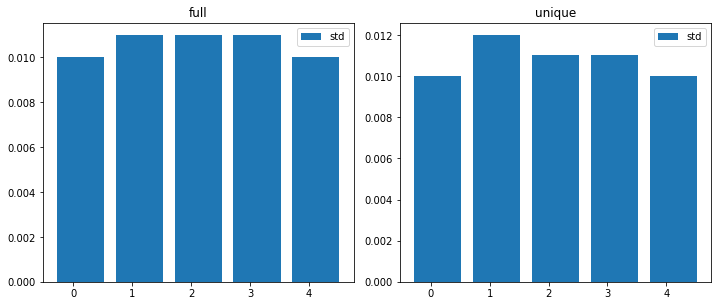

In [139]:
import FSDL.plate_recognizer.utils.plots as plots

titles = ["full", "unique"]
plots.plot_stats(stats, ["std"], titles)

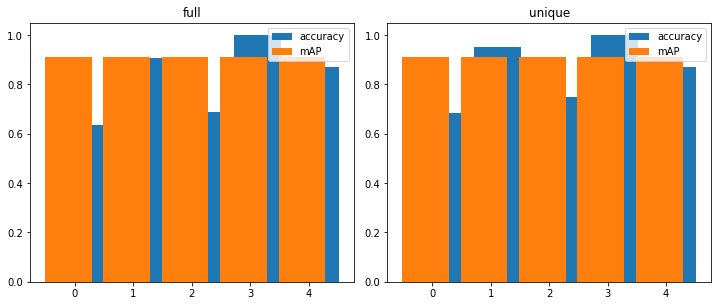

In [140]:
titles = ["full", "unique"]
plots.plot_stats(stats, ["accuracy", "mAP"], titles)

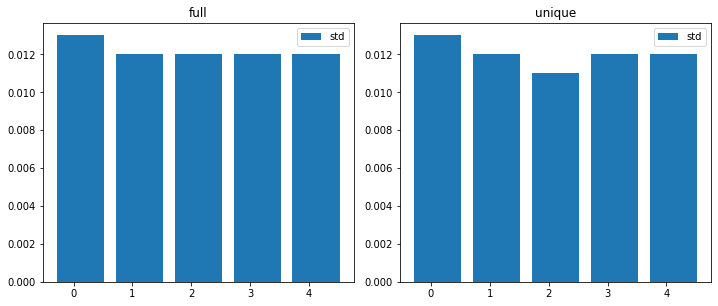

In [141]:
titles = ["full", "unique"]
plots.plot_stats(stats_uniq, ["std"], titles)

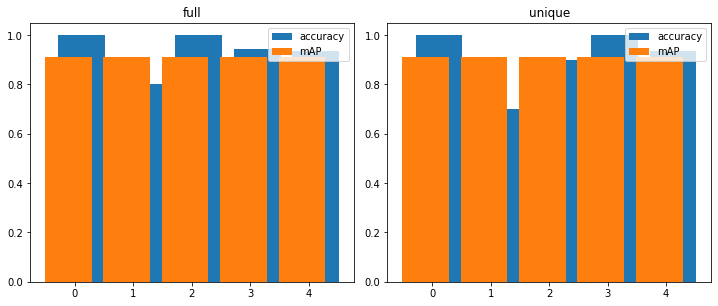

In [142]:
titles = ["full", "unique"]
plots.plot_stats(stats_uniq, ["accuracy", "mAP"], titles)

1/1 [==============================] - 0s 45ms/step - loss: 0.0011 - accuracy: 1.0000
2021-06-01 09:16:02,831 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91


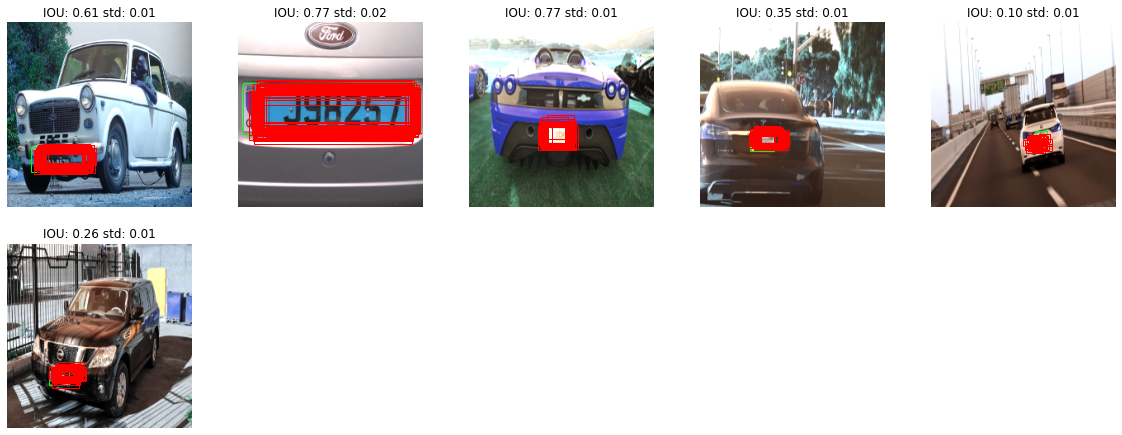

In [132]:
X_test_uniq, Y_test_uniq = kaggle_data_uniq.get_data(data_type=DataType.Test, cluster_id=0)

y_preds_uniq, m_ap_uniq, mstd_uniq, accuracy_uniq = \
  predictor.predict_on_cluster(model_cnn, X_test_uniq, Y_test_uniq, iterations=50)
plots.plot_predictions(X_test_uniq, Y_test_uniq, y_preds_uniq)

1/1 [==============================] - 0s 79ms/step - loss: 0.0047 - accuracy: 0.6364
2021-06-01 09:15:57,339 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91


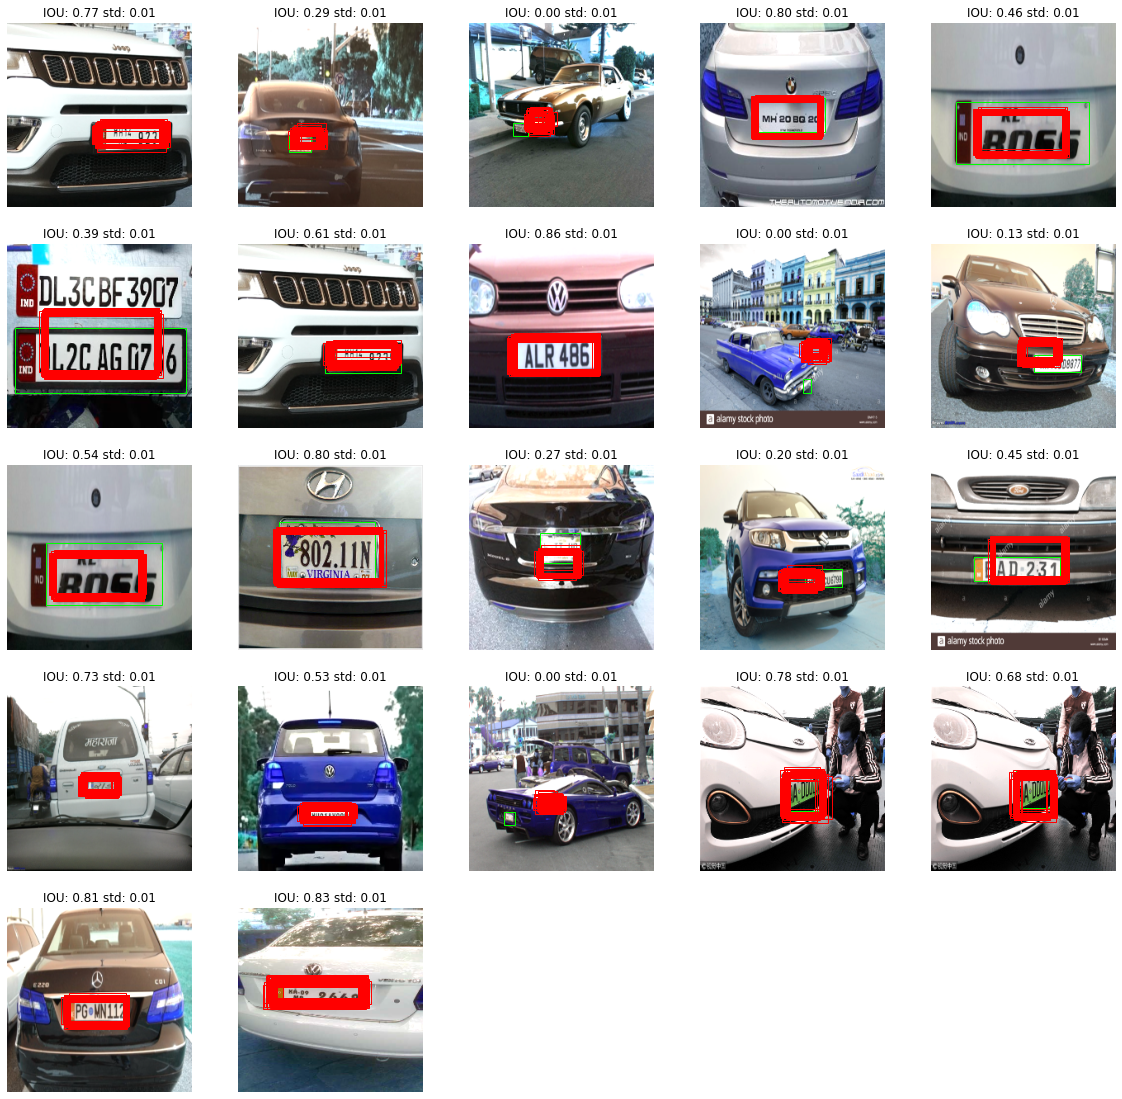

In [131]:
X_test, Y_test = kaggle_data.get_data(data_type=DataType.Test, cluster_id=0)

y_preds, m_ap, mstd, accuracy = \
  predictor.predict_on_cluster(model_cnn, X_test, Y_test, iterations=50)
plots.plot_predictions(X_test, Y_test, y_preds)